In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 
from pandas_profiling import ProfileReport
from sklearn.impute import SimpleImputer

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Sherin/train (1).csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
set(df['HomePlanet'])

{'Earth', 'Europa', 'Mars', nan}

In [ ]:
def univalues(df):
  l=[]
  for i in df.columns :
      l.append(df[i].unique)
  return l
  


x=univalues(df)
print(x)
 
  
    



[<bound method Series.unique of 0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object>, <bound method Series.unique of 0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8693, dtype: object>, <bound method Series.unique of 0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: object>, <bound method Series.unique of 0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object>, <bound

In [ ]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [ ]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
df1=df[df['Transported']==True]
df.groupby('Transported')['Age'].mean()


Transported
False    29.922858
True     27.748834
Name: Age, dtype: float64

In [ ]:
df.groupby('Transported')['Cabin'].count()

Transported
False    4216
True     4278
Name: Cabin, dtype: int64

Transported  False  True
CryoSleep               
False         3650  1789
True           554  2483


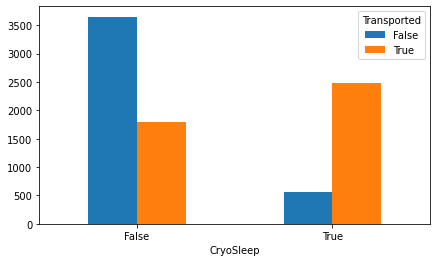

In [ ]:

cyro=pd.crosstab(index=df['CryoSleep'],columns=df['Transported'])
print(cyro)
cyro.plot.bar(figsize=(7,4), rot=0)

In [ ]:
#v['Transported']

In [ ]:
cyro

Transported,False,True
CryoSleep,,
False,3650,1789
True,554,2483


Out of 3037 people who were on cryosleep 2483 people were transported.So their transportation has somethng to do this cryosleep.


People who were not on cryosleep were not transported

In [ ]:
v=pd.DataFrame(cyro)
v

Transported,False,True
CryoSleep,,
False,3650,1789
True,554,2483


In [ ]:
v.columns

Index([False, True], dtype='object', name='Transported')

In [ ]:
v.iloc[::]

Transported,False,True
CryoSleep,,
False,3650,1789
True,554,2483


In [ ]:
v['False']

KeyError: ignored

In [ ]:
v.info()

42% of people from earth were transported

66% of people from Europa were transported(HIGHEST)

52% of people from Europa were transported

Almost 43% of people from earth were transported.

In [ ]:

cyro=pd.crosstab(index=df['HomePlanet'],columns=df['Transported'])
print(cyro)
cyro.plot.bar(figsize=(7,4), rot=0)

In [ ]:
tf=ProfileReport(df)
tf.to_notebook_iframe()

In [ ]:
def seperatedeck(x):
  if len(str(x).split('/'))<3:
    return ['Missing','Missing','missing']
  else:
     return str(x).split('/')



In [ ]:
#preprocessing stage
def preprocessing(df):
  df['HomePlanet']=df['HomePlanet'].fillna('Missing')
  df['Tempcabin']=df['Cabin'].apply(lambda x: seperatedeck(x))
  df['deck']=df['Tempcabin'].apply(lambda x:x[0])
  df['Side']=df['Tempcabin'].apply(lambda x:x[2])
  df.drop(['Tempcabin','Cabin'],axis=1,inplace=True)
  #Destination
  df['Destination'].fillna('Missing',inplace=True)
  #impute age
  df['Age']=df['Age'].fillna(df['Age'].median())
  #impute other columns.
  df['RoomService'].fillna(0,inplace=True)
  df['CryoSleep'].fillna('Missing',inplace=True)
  df['VIP'].fillna('Missing',inplace=True)
  df['FoodCourt'].fillna(0,inplace=True)
  df['ShoppingMall'].fillna(0,inplace=True)
  df['Spa'].fillna(0,inplace=True)
  df['VRDeck'].fillna(0,inplace=True)
  #name-high cardinality.drop
  df.drop('Name',axis=1,inplace=True)
  #df.dropna(inplace=True)





In [ ]:
abt=df.copy()
abt.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
preprocessing(abt)

In [ ]:
abt.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
deck            0
Side            0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [ ]:
X=abt.drop(['Transported','PassengerId'],axis=1)
Y=abt['Transported']

In [ ]:
X=pd.get_dummies(X)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=49)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [ ]:
pipelines={
    'rf': make_pipeline(StandardScaler(),RandomForestClassifier()),
    'gb': make_pipeline(StandardScaler(),GradientBoostingClassifier())
   
}

In [ ]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
grid={
    'rf': {'randomforestclassifier__n_estimators':[100,200,300],
           'randomforestclassifier__criterion':['gini','entropy'],
           'randomforestclassifier__n_estimators':[12,56,123,37],
           'randomforestclassifier__max_depth':[5,8,12,24,16,19],
           'randomforestclassifier__min_samples_split':range(2,8)
           },
    'gb' :{
        'gradientboostingclassifier__n_estimators':[13,123,300,250],
        'gradientboostingclassifier__ccp_alpha':[0.03,0.01,0.05,0.0234],
        'gradientboostingclassifier__max_leaf_nodes' :[2,4,12,23,24,9]


    }


}

In [ ]:
pipelines['rf']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
fit_models={}
#access pipeline and train
for algo,pipeline in pipelines.items():
  model=GridSearchCV(pipeline,grid[algo],cv=10)
  model.fit(X_train,Y_train)
  fit_models[algo]=model

In [ ]:
#Evaluate Performance on test
from sklearn.metrics import accuracy_score,precision_score,recall_score


In [ ]:
for algo,model in fit_models.items():
  y_hat=model.predict(X_test)
  print(f'metrics for {algo} :accuracy {accuracy_score(Y_test,y_hat)} ,recall={recall_score(Y_test,y_hat)},precision-{precision_score(Y_test,y_hat)}')

metrics for rf :accuracy 0.7944785276073619 ,recall=0.7878326996197719,precision-0.8012374323279196
metrics for gb :accuracy 0.7162576687116564 ,recall=0.5741444866920152,precision-0.8074866310160428


In [ ]:
import pickle
with open('titanicmodel.pkl','wb') as f:
  pickle.dump(fit_models['gb'],f)

In [ ]:
with open('titanicmodel.pkl','rb') as f:
  mod=pickle.load(f)

TEST DATA

In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/Sherin/test (1).csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
test_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [ ]:
abt_t=test_df.copy()
preprocessing(abt_t)
abt_t=pd.get_dummies(abt_t.drop('PassengerId',axis=1))

In [ ]:
y_hat=fit_models['rf'].predict(abt_t)
#submission=pd.DataFrame(test_df['PassengerId'],y_hat)



In [ ]:
submission=pd.DataFrame([test_df['PassengerId'],y_hat]).T

In [ ]:
submission.to_csv('kaggle_submission.csv',index=False)

In [ ]:
!kaggle competitions submit -c spaceship-titanic -m "random forest model" -f "kaggle_submission.csv" 

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
